In [40]:
from analysis.people import find_all_matches, con

In [41]:
df = find_all_matches(con, limit=4000)
df


--- Overlaps between Koryta, KRS, PKW, and Wiki ---


,koryta_name,krs_name,pkw_name,wiki_name,birth_year,overall_score
0,Rafał Rajkowski,Rafał Rajkowski,RAJKOWSKI Rafał Piotr,Rafał Rajkowski,1973,15
1,Wiesław Raboszuk,Wiesław Mariusz Raboszuk,RABOSZUK Wiesław Mariusz,Wiesław Raboszuk,1966,15
2,Ludwik Rakowski,Ludwik Jerzy Rakowski,RAKOWSKI Ludwik Jerzy,Ludwik Rakowski,1975,15
3,Marek Rutka,Marek Andrzej Rutka,RUTKA Marek Andrzej,Marek Rutka,1975,15
4,Paweł Bartoszek,Paweł Bartoszek,BARTOSZEK Paweł,Paweł Bartoszek,1980,15
5,Henryk Łucjan,Henryk Łucjan,ŁUCJAN Henryk,None,1955,14
6,Łukasz Guliński,Łukasz Jerzy Guliński,GULIŃSKI Łukasz Jerzy,None,1976,14
7,Michał Wieremiejczyk,Michał Wieremiejczyk,WIEREMIEJCZYK Michał,None,1973,14
8,Krzysztof Michalski,Krzysztof Michalski,MICHALSKI Krzysztof Bogdan,None,1967,14
9,Filip Szymczak,Filip Janusz Szymczak,SZYMCZAK Filip Janusz,None,1986,14


In [ ]:
import matplotlib.pyplot as plt

columns_to_check = ['koryta_name', 'krs_name', 'pkw_name', 'wiki_name']

combination_counts = df[columns_to_check].notnull().groupby(columns_to_check).size()
combination_counts = combination_counts.sort_values(ascending=False)

bar_colors = []

# 3. Format the index for better plotting
# We'll turn the boolean index (e.g., (True, False, True, False)) into a readable string
def format_label(combo_tuple, column_names):
    parts = []
    for name, is_present in zip(column_names, combo_tuple):
        # Use checkmarks and crosses for visual clarity
        symbol = '✓' if is_present else '✗'
        parts.append(f'{name} {symbol}')
    # koryta, krs, pkw, wiki
    color = {
        (True, True, True, True): "green",
        (True, True, True, False): "green",
        (True, True, False, True): "green",
        (True, True, False, False): "green",
        (False, True, True, True): "green",
        (False, True, True, False): "green",
        (False, True, False, True): "yellow",
        (False, True, False, False): "yellow",
    }.get(combo_tuple, "#a133ff")
    bar_colors.append(color)
    return ', '.join(parts)

# The index of our Series is a MultiIndex, so we access its values
new_labels = [format_label(combo, columns_to_check) for combo in combination_counts.index]
combination_counts.index = new_labels

# 4. Create the plot
plt.figure(figsize=(12, 8))
# A horizontal bar chart is often best for many categories with long labels
ax = combination_counts.plot(
    kind='barh',
    color=bar_colors,
    title='Frequency of Column Presence Combinations'
)

ax.set_xlabel("Number of Rows")
ax.set_ylabel("Column Presence Pattern")

# Add the count labels next to the bars for clarity
for i, v in enumerate(combination_counts):
    ax.text(v + 0.5, i, str(v), color='black', va='center', fontweight='bold')


plt.tight_layout()
plt.show()

In [43]:
import pandas as pd

color_df = pd.DataFrame({
    'count': combination_counts,
    'color': bar_colors
})

# 2. Aggregate the counts by color
aggregated_counts = color_df.groupby('color').sum()
aggregated_counts['label'] = ['Good already', 'Needs work'] # Create readable labels
aggregated_counts = aggregated_counts.set_index('label') # Use labels for the pie chart
aggregated_counts

,count
label,
Good already,1330
Needs work,2670


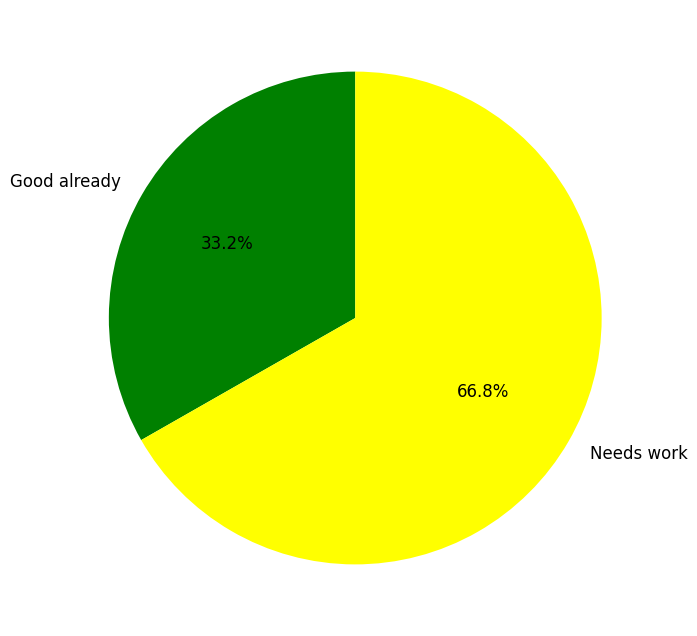

In [44]:
plt.figure(figsize=(8, 8))
aggregated_counts['count'].plot(
    kind='pie',
    colors=['green', 'yellow'], # Use the group colors for the slices
    autopct='%1.1f%%',         # Format to show percentages with one decimal place
    startangle=90,             # Rotate the pie chart for better alignment
    fontsize=12,
)

plt.ylabel('') # This removes the default 'count' label from the side of the pie chart
plt.show()